<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ambient-noise-two-station-interferometry-($\mathcal{I}_2^{AN}$)" data-toc-modified-id="Ambient-noise-two-station-interferometry-($\mathcal{I}_2^{AN}$)-1">Ambient noise two-station interferometry ($\mathcal{I}_2^{AN}$)</a></span></li><li><span><a href="#Motivation" data-toc-modified-id="Motivation-2">Motivation</a></span></li><li><span><a href="#Notation" data-toc-modified-id="Notation-3">Notation</a></span></li><li><span><a href="#Three-station-interferometry" data-toc-modified-id="Three-station-interferometry-4">Three-station interferometry</a></span><ul class="toc-item"><li><span><a href="#Direct-wave-interferometry" data-toc-modified-id="Direct-wave-interferometry-4.1">Direct-wave interferometry</a></span><ul class="toc-item"><li><span><a href="#Hyperbolic-stationary-phase-zones-($^{hyp}\mathcal{I}_3^{DW}$)" data-toc-modified-id="Hyperbolic-stationary-phase-zones-($^{hyp}\mathcal{I}_3^{DW}$)-4.1.1">Hyperbolic stationary phase zones ($^{hyp}\mathcal{I}_3^{DW}$)</a></span><ul class="toc-item"><li><span><a href="#Cut-direct-waves" data-toc-modified-id="Cut-direct-waves-4.1.1.1">Cut direct-waves</a></span></li><li><span><a href="#Compute-source-specific-direct-wave-correlation-$^{hyp}C_3^{DW}$" data-toc-modified-id="Compute-source-specific-direct-wave-correlation-$^{hyp}C_3^{DW}$-4.1.1.2">Compute source-specific direct-wave correlation $^{hyp}C_3^{DW}$</a></span></li><li><span><a href="#Stack-for-$^{hyp}\mathcal{I}_3^{DW}$" data-toc-modified-id="Stack-for-$^{hyp}\mathcal{I}_3^{DW}$-4.1.1.3">Stack for $^{hyp}\mathcal{I}_3^{DW}$</a></span></li></ul></li><li><span><a href="#Elliptical-stationary-phase-zones-($^{ell}\mathcal{I}_3^{DW}$)" data-toc-modified-id="Elliptical-stationary-phase-zones-($^{ell}\mathcal{I}_3^{DW}$)-4.1.2">Elliptical stationary phase zones ($^{ell}\mathcal{I}_3^{DW}$)</a></span><ul class="toc-item"><li><span><a href="#Compute-source-specific-direct-wave-convolution-$^{ell}C_3^{DW}$" data-toc-modified-id="Compute-source-specific-direct-wave-convolution-$^{ell}C_3^{DW}$-4.1.2.1">Compute source-specific direct-wave convolution $^{ell}C_3^{DW}$</a></span></li><li><span><a href="#Stack-for-$^{ell}\mathcal{I}_3^{DW}$" data-toc-modified-id="Stack-for-$^{ell}\mathcal{I}_3^{DW}$-4.1.2.2">Stack for $^{ell}\mathcal{I}_3^{DW}$</a></span></li></ul></li></ul></li><li><span><a href="#Coda-wave-interferometry" data-toc-modified-id="Coda-wave-interferometry-4.2">Coda-wave interferometry</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Cut-coda-waves" data-toc-modified-id="Cut-coda-waves-4.2.0.1">Cut coda-waves</a></span></li><li><span><a href="#Compute-source-specific-coda-wave-correlation-$C_3^{CW}$" data-toc-modified-id="Compute-source-specific-coda-wave-correlation-$C_3^{CW}$-4.2.0.2">Compute source-specific coda-wave correlation $C_3^{CW}$</a></span></li><li><span><a href="#Stack-for-$\mathcal{I}_3^{CW}$" data-toc-modified-id="Stack-for-$\mathcal{I}_3^{CW}$-4.2.0.3">Stack for $\mathcal{I}_3^{CW}$</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Reference" data-toc-modified-id="Reference-5">Reference</a></span></li><li><span><a href="#Helper-functions" data-toc-modified-id="Helper-functions-6">Helper functions</a></span></li></ul></div>

<h2 style="text-align: center"><span class="tocSkip"></span>2021 Lamont-Doherty Seismology Student Workshop IX</h2>
<h1 style="text-align: center"><span class="tocSkip"></span>Live Demonstration on Three-Station Interferometry</h1>
<h2 style="text-align: center"><span class="tocSkip"></span>Shane Zhang*</h2>
<h3 style="text-align: center"><span class="tocSkip"></span>University of Colorado Boulder</h3>
<h3 style="text-align: center"><span class="tocSkip"></span>March 24th, 2021</h3>
<h4 style="text-align: center"><span class="tocSkip"></span><a href="mailto:shzh3924@colorado.edu">*shzh3924@colorado.edu</a></h4>

First, let's import and run the Helper Functions at the bottom.

We will use `Jupyter Notebook` and `ObsPy` heavily so the first Live Demo may be helpful if you are not familiar with them.

In [13]:
from os.path import join

import matplotlib.pyplot as plt
import numpy as np
import obspy
from obspy import read, Stream, Trace, UTCDateTime
from obspy.signal.cross_correlation import correlate
from obspy.geodetics.base import gps2dist_azimuth
import pandas as pd


plt.rcParams.update({
    'figure.dpi': 200,
})


DATADIR = './data'

## Ambient noise two-station interferometry ($\mathcal{I}_2^{AN}$)

Let's recall the basic idea of ambient noise two-station interferometry (sometimes also called "ambient noise interferometry" or "ambient noise correlation").

You can learn the practical processing to produce two-station interferograms from the raw data in the fourth Live Demo on `MSNoise` later today.

<figure>
    <img src="figs/ZFR20_3b.png" class="center" style="width:50%">
    <figcaption><b>Fig: Schematic of ambient noise two-station interferometry.</b> The two receivers are shown with the blue and green triangles, and the circles are locations of noise sources. Those sources that are in the stationary phase zones (shaded region) are shown with red circles and those outside the stationary phase zones with gray circles.</figcaption>
</figure>

Let's read the metadata of the stations we are going to use.

In [5]:
meta = pd.read_csv(join(DATADIR, 'meta.csv'))
# meta

Here we choose two stations as "receiver-stations", and all other stations as "source-stations". 

The two receiver-stations are chosen to be **synchronous** so that we have two-station interferograms ($\mathcal{I}_2^{AN}$) between them to compare with three-station interferograms ($\mathcal{I}_3$).

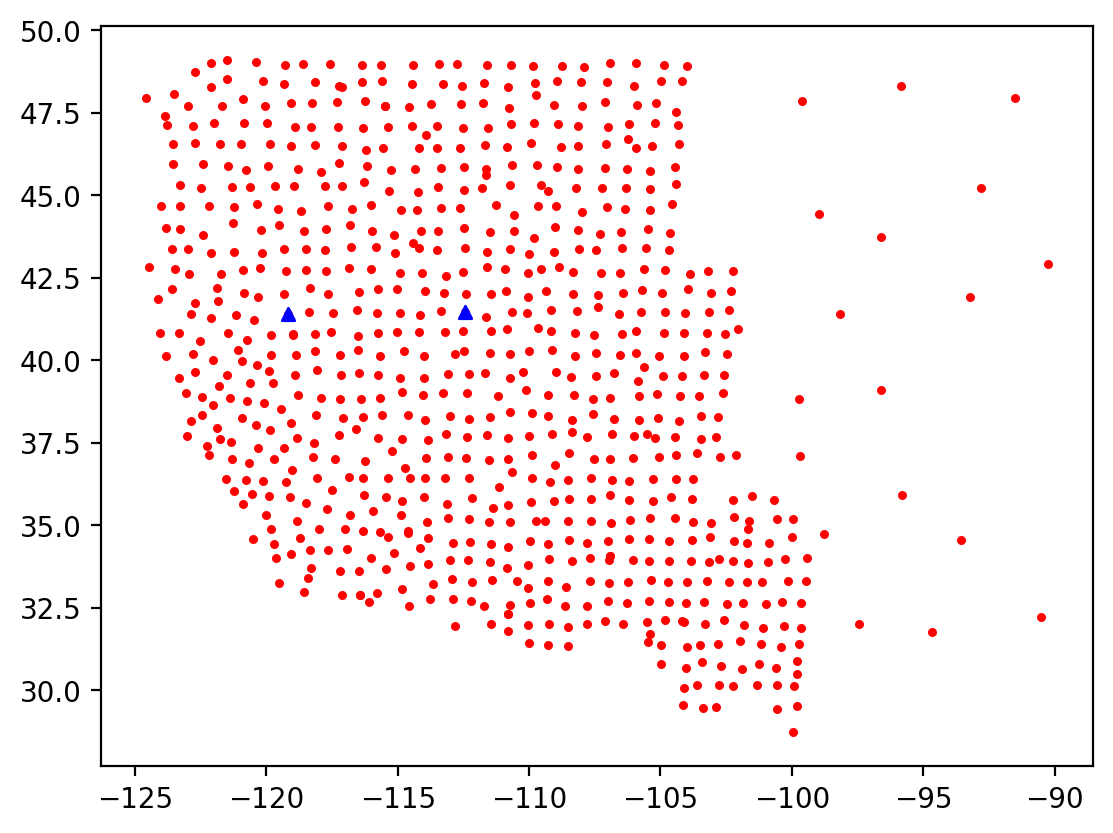

In [8]:
rec_sta_1 = 'M07A'
rec_sta_2 = 'M15A'

lon_r1 = meta[meta['sta'] == rec_sta_1]['lon'].iloc[0]
lat_r1 = meta[meta['sta'] == rec_sta_1]['lat'].iloc[0]
lon_r2 = meta[meta['sta'] == rec_sta_2]['lon'].iloc[0]
lat_r2 = meta[meta['sta'] == rec_sta_2]['lat'].iloc[0]


fig, ax = plt.subplots()
ax.scatter(meta['lon'], meta['lat'], s=5, marker='o', c='r')
for s in [rec_sta_1, rec_sta_2]:
    m = meta[meta.sta == s]
    ax.scatter(m['lon'], m['lat'], s=20, marker='^', c='b')

For each of the receiver station, we plot the two-station interferograms $\mathcal{I}_2^{AN}$ between it and the source-stations, which serves as the basis for three-station interferometry.

In [14]:
I2_r1 = obspy.read(join(DATADIR, 'I2', rec_sta_1, '*.SAC'))
I2_r2 = obspy.read(join(DATADIR, 'I2', rec_sta_2, '*.SAC'))

t0 = UTCDateTime('2021-03-24T00:00:00')

for I2 in [I2_r1, I2_r2]:
    for tr in I2:
        tr.stats.distance = tr.stats.sac.dist * 1e3
        tr.stats.starttime = t0

I2_r1 = sort_stream(I2_r1, 'dist')
I2_r2 = sort_stream(I2_r2, 'dist')

for I2 in [I2_r1, I2_r2]:
    
#     I2.filter('bandpass', freqmax=1/20, freqmin=1/50, zerophase=True)

    fig = I2[::40].plot(
        type='section', orientation='horizontal', dpi=200,
        reftime=t0+3000, recordstart=-1000, recordlength=2000,
        linewidth=.5, alpha=1, grid_linewidth=0, scale=.5,
#         offset_min=0, offset_max=1500e3,
    )

NameError: name 'sort_stream' is not defined

## Motivation

The development of three-station interferometry was motivated by the limitation of two-station interferometry ($\mathcal{I}_2^{AN}$):
- $\mathcal{I}_2^{AN}$ works iff two stations are deployed at the same time (synchronously), i.e., it does not work if two stations are deployed at different times (*asynchronously*).
- $\mathcal{I}_2^{AN}$ effectively accentuates coherent signals in the ambient noise via correlation, however, weak but useful signals could be hidden in $\mathcal{I}_2^{AN}$ and are discarded later (e.g., due to low signal-to-noise ratio (SNR) especially at long periods).
- The coda-wave part of $\mathcal{I}_2^{AN}$ is not used for imaging.

While two-station interferometry ($\mathcal{I}_2^{AN}$) is well-established, three-station interferometry is still under rapid development but seems to receive more attention recently. Thus, this demo is intended to be **exploratory** and to give you a clear description of the basic idea. Those of you who are interested are encouraged to try the method in your own study.

For clarity, we will present the development in **logical** (from my perspective) rather than historical order. A more thorough overview of the literature can be found in the Reference.

<figure>
    <img src="figs/ZFR20_1.png" class="center" style="width:100%">
    <figcaption><b>Fig: Notation for interferometry.</b> (a) Two-station interferometry. $C_2(r_i, r_j)$ is the cross-correlation between processed
seismograms recorded at receiver-stations $r_i$ and $r_j$. The two-station estimated Green's function, $\hat G_2(r_i,r_j)$, can be
determined from $C_2$ after applying an appropriate phase shift. Receiver-stations $r_i$ and $r_j$ must operate synchronously.
(b) Three-station interferometry. Cross-correlations between
seismograms recorded at each source-station, $s_k$, with records at receiver-stations, $r_i$ and $r_j$,
are denoted $C_2(s_k, r_i)$ and $C_2(s_k, r_j)$. Direct-wave or coda-wave parts of these records are cross-correlated or
convolved to measure the source-specific interferogram, $C_3(r_i, r_j; s_k)$, which can be summed over contributions from many source-stations to produce the three-station
composite Green's function, $\hat G_3(r_i,r_j)$, between the receiver-stations. Receiver-stations $r_i$ and $r_j$ need not operate
synchronously with one another, but both must overlap the operation of each source-station.</figcaption>
</figure>

## Notation

- $\mathcal{I}_2^{AN}$: Two-station ambient noise interferometry.
- $C_3$: Source-specific three-station interferogram.
- ${}^{geometry}\mathcal{I}_3^{type}$: Stack of source-specific three-station interferograms using data **type** with **geometry** constraints on source-stations.
    - $^{hyp}\mathcal{I}_3^{DW}$: Three-station **direct-wave** interferometry with source-stations in the **hyperbolic** stationary phase zones radially outside the receiver stations.
    - $^{ell}\mathcal{I}_3^{DW}$:  Three-station **direct-wave** interferometry with source-stations in the **elliptical** stationary phase zone between the receiver stations.
    - $\mathcal{I}_3^{CW}$: Three-station **coda-wave** interferometry.

## Three-station interferometry

The recipe to produce $\mathcal{I}_3$:
1. Prepare two-station interferogram $\mathcal{I}_2$ (cut signals, preprocess, etc.).
- For each source-station common to a pair of receirve-station, compute source-specific three-station interferogram $C_3$.
- Stack source-specific interferogram $C_3$ to constrcut $\mathcal{I}_3$.

For simplicity, we consider only the **symmetric** components of correlations (the average of positive and negative lags). A direct implication is that we can not say that the source distribution becomes more isotropic for $\mathcal{I}_3$ if the resultant $\mathcal{I}_3$ is more symmetric, because the positive and negative lags have different source sensitivities.

To be more specific, let $P_i$ denote the positive lag of the correlation between a source-station and a receiver-station $i$, and let $N_i$ denote the *time-reversed* negative lag. Then the operator $\star$ (correlation or convolution) acting on the symmetric components yields

$$
(P_{a} + N_{a}) \star (P_{b} + N_{b})
= \underbrace{P_{a} \star P_{b} + N_{a} \star N_{b}}_{\text{Same lag}}
+ \underbrace{P_{a} \star N_{b} + N_{a} \star P_{b}}_{\text{Cross lag}}
$$

In [2]:
src_to_I2_r1 = {}
src_to_I2_r2 = {}
for I2, s2r, ri in zip(
    [I2_r1, I2_r2],
    [src_to_I2_r1, src_to_I2_r2],
    [rec_sta_1, rec_sta_2],
):
    for tr in I2:
        tmp = symmetrize(tr)
        src = (set([tr.stats.sac.kevnm.strip(), tr.stats.sac.kstnm.strip()]) - set([ri])).pop()
        s2r[src] = tmp
    
for s2r in [src_to_I2_r1, src_to_I2_r2]:
    _I2 = Stream(s2r.values())
    fig = _I2[::40].plot(
        type='section', orientation='horizontal', recordlength=1000, dpi=200,
        linewidth=.5, alpha=1, grid_linewidth=0, sclae=.5,
#         offset_min=0, offset_max=1500e3,
    )

NameError: name 'I2_r1' is not defined

### Direct-wave interferometry

As will be clear later, the most important difference comes from which part of the data do we choose as signal, i.e., direct- vs. coda-waves. By drawing analogy with $\mathcal{I}_2^{AN}$, the direct-wave part seems to be a more natural choice.

#### Hyperbolic stationary phase zones ($^{hyp}\mathcal{I}_3^{DW}$)

Again borrowing insights from $\mathcal{I}_2^{AN}$, we know that not all source-stations (noise sources) are created equal. For the correlation, only sources in a hyperbolic stationary phase zone make the dominant contribution. The method $^{hyp}\mathcal{I}_3^{DW}$ is so similar to $\mathcal{I}_2^{AN}$ that we could reinterpret the schematic for $\mathcal{I}_2^{AN}$.

<figure>
    <img src="figs/ZFR20_3b2.png" class="center" style="width:50%">
    <figcaption><b>Fig: Schematic of the geometrical constraints on source–stations for $^{hyp}\mathcal{I}_3^{DW}$. </b>Similar to the schematic for $\mathcal{I}_2^{AN}$, except circles now represent <b>source-stations</b>. For $^{hyp}\mathcal{I}_3^{DW}$, source–stations must lie in stationary phase hyperbolae (purple shading). </figcaption>
</figure>

##### Cut direct-waves

Now let's do the first step, to cut direct-waves in two-station interferograms $\mathcal{I}_2$. 

In [1]:
src_to_I2_r1_dw = {src: cut_signal(tr) for src, tr in src_to_I2_r1.items()}
src_to_I2_r2_dw = {src: cut_signal(tr) for src, tr in src_to_I2_r2.items()}

for s2r in [src_to_I2_r1_dw, src_to_I2_r2_dw]:
    _I2 = Stream(s2r.values())

#     _I2.filter('bandpass', freqmax=1/5, freqmin=1/20, zerophase=True)
    
    fig = _I2[::40].plot(
        type='section', orientation='horizontal', dpi=200,
        linewidth=.5, alpha=1, grid_linewidth=0, scale=.5, recordlength=1000,
#         offset_min=0, offset_max=1500e3,
    )

NameError: name 'src_to_I2_r1' is not defined

##### Compute source-specific direct-wave correlation $^{hyp}C_3^{DW}$

Now let's do step 2: For each source-station common to a pair of receiver-stations, compute the source-specific direct-wave correlations $^{hyp}C_3^{DW}$. And plot them in a record section sorted by the source-station azimuth $\theta$.

In [ ]:
kwargs_C3 = {
    'meta': meta,
    'lon_r1': lon_r1,
    'lat_r1': lat_r1,
    'lon_r2': lon_r2,
    'lat_r2': lat_r2,
    'max_theta': 8,
}

C3_all_hyp, C3_spz_hyp = source_specfic_interferometry(
    src_to_I2_r1_dw, src_to_I2_r2_dw, **kwargs_C3
)

C3_all_hyp = sort_stream(C3_all_hyp, 'theta', sac=False)
time = np.arange(-3000, 3001)
ax = plt_stream_vs_theta(C3_all_hyp[::10], scale=3, time=time)
ax.set_xlim(-1000, 1000)


lim = kwargs_C3['max_theta']
for theta1, theta2 in ([0, lim], [360-lim, 360], [180-lim, 180+lim]):
    ax.axhspan(theta1, theta2, color='g', alpha=.3)


ax = plt_mesh(C3_all_hyp, time=time)
ax.set_xlim(-500, 500)

##### Stack for $^{hyp}\mathcal{I}_3^{DW}$

Now the third step: Stack source-specific correlation $^{hyp}C_3^{DW}$ to constrcut $^{hyp}\mathcal{I}_3^{DW}$.

A straight-forward approach is to stack all the $^{hyp}C_3^{DW}$ where all source-stations are used. However, we learned from $\mathcal{I}_2^{AN}$ that only sources within the stationary phase zone (SPZ) make the dominant contribution.

For simplicity, the stationary phase zone is chosen to be frequency-independent: $\theta < \theta_0$, and the amplitude of each $C_3$ is normalized to unit before stacking.

In [ ]:
I3_all_hyp = symmetrize(stack_stream(Stream(C3_all_hyp)))
I3_spz_hyp = symmetrize(stack_stream(Stream(C3_spz_hyp)))
I2_ref = symmetrize(read(join(DATADIR, 'I2', rec_sta_1, f'COR_{rec_sta_1}_{rec_sta_2}.SAC'))[0])

ax = plt_stack(I3_all_hyp, I3_spz_hyp, I2_ref, Tmin=5, Tmax=150)
ax.set_title('$^{hyp}\mathcal{I}_3^{DW}$')
ax.set_xlim(0, 500)

<br>
<br>
<br>
Any questions?
<br>
<br>
<br>
<br>

#### Elliptical stationary phase zones ($^{ell}\mathcal{I}_3^{DW}$)

<figure>
    <img src="figs/ZFR20_3c.png" class="center" style="width:50%">
    <figcaption><b>Fig: Schematic of the geometrical constraints on source–stations for $^{ell}\mathcal{I}_3^{DW}$. </b>Similar to the schematic for $^{hyp}\mathcal{I}_3^{DW}$, except source–stations must lie in stationary phase ellipses (purple shading). </figcaption>
</figure>

##### Compute source-specific direct-wave convolution $^{ell}C_3^{DW}$

It turns out we could use not only correlation but also **convolution** for interferometry.

For each source-station, let's compute the source-specific direct-wave convolution $^{ell}C_3^{DW}$.

In [ ]:
C3_all_ell, C3_spz_ell = source_specfic_interferometry(
    src_to_I2_r1_dw, src_to_I2_r2_dw, meta,
    lon_r1, lat_r1, lon_r2, lat_r2,
    geometry='ell',
)

C3_all_ell = sort_stream(C3_all_ell, 'theta', sac=False)
ax = plt_stream_vs_theta(C3_all_ell[::10], scale=1)
ax.set_xlim(0, 2000)
ax.axhspan(0, kwargs_C3['max_theta'], color='g', alpha=.3)


ax = plt_mesh(C3_all_ell)
ax.set_xlim(0, 1500)

##### Stack for $^{ell}\mathcal{I}_3^{DW}$

Let's stack source-specific convolution $^{ell}C_3^{DW}$ to construct $^{ell}\mathcal{I}_3^{DW}$.

In [ ]:
I3_all_ell = stack_stream(Stream(C3_all_ell))
I3_spz_ell = stack_stream(Stream(C3_spz_ell))

ax = plt_stack(I3_all_ell, I3_spz_ell, I2_ref, scale=.5, Tmin=5, Tmax=100)
ax.set_title('$^{ell}\mathcal{I}_3^{DW}$')

### Coda-wave interferometry

<figure>
    <img src="figs/ZFR20_3a.png" class="center" style="width:50%">
    <figcaption><b>Fig: Schematic of the geometrical constraints on source–stations for $\mathcal{I}_3^{CW}$. </b>Similar to the schematic for $^{hyp}\mathcal{I}_3^{DW}$, except there is no constraints on source–station locations.</figcaption>
</figure>

##### Cut coda-waves

So far, we have discarded coda-waves in $\mathcal{I}_2^{AN}$. Noting that the nature of coda in $\mathcal{I}_2^{AN}$ is not well understood, we try coda correlations, which is reminiscent of the earthquake coda correlation method.

First, we cut only coda-waves.

In [ ]:
src_to_I2_r1_cw = {src: cut_signal(tr, cw=True) for src, tr in src_to_I2_r1.items()}
src_to_I2_r2_cw = {src: cut_signal(tr, cw=True) for src, tr in src_to_I2_r2.items()}

for s2r in [src_to_I2_r1_cw, src_to_I2_r2_cw]:
    _I2 = Stream(s2r.values())

#     _I2.filter('bandpass', freqmax=1/10, freqmin=1/20, zerophase=True)
    
    fig = _I2[::50].plot(
        type='section', orientation='horizontal', dpi=200,
        linewidth=.5, alpha=1, grid_linewidth=0, scale=.5,
    )

##### Compute source-specific coda-wave correlation $C_3^{CW}$

Then, let's compute the source-specific coda-wave correlation $C_3^{CW}$.

In [ ]:
C3_all_cw, C3_spz_cw = source_specfic_interferometry(
    src_to_I2_r1_cw, src_to_I2_r2_cw, 
    geometry='hyp', **kwargs_C3
)

C3_all_cw = sort_stream(C3_all_cw, 'theta', sac=False)
ax = plt_stream_vs_theta(C3_all_cw[::20], scale=5, time=time)
ax.set_xlim(-1000, 1000)

lim = kwargs_C3['max_theta']
for theta1, theta2 in ([0, lim], [360-lim, 360], [180-lim, 180+lim]):
    ax.axhspan(theta1, theta2, color='g', alpha=.3)


ax = plt_mesh(C3_all_cw, time=time, Tmin=5, Tmax=100)
ax.set_xlim(-500, 500)

##### Stack for $\mathcal{I}_3^{CW}$

And let's stack source-specific coda-wave correlations $C_3^{CW}$ to construct $\mathcal{I}_3^{CW}$.

In [ ]:
I3_all_cw = symmetrize(stack_stream(Stream(C3_all_cw)))
I3_spz_cw = symmetrize(stack_stream(Stream(C3_spz_cw)))

ax = plt_stack(I3_all_cw, I3_spz_cw, I2_ref, scale=.5, Tmin=5, Tmax=100)
ax.set_title('$\mathcal{I}_3^{CW}$')

## Reference

- Talk on applications to tomography is in 30m (**11:20 am ET**).
- The full package: https://github.com/NoiseCIEI/ThreeStation
- Detailed description of the method and application for isotropic structures:<br>
Shane Zhang, Lili Feng, Michael H Ritzwoller, **Three-station interferometry and tomography: coda versus direct waves**, *Geophysical Journal International*, Volume 221, Issue 1, April 2020, Pages 521–541, https://doi.org/10.1093/gji/ggaa046
- Improvement of the method and application for OBS and azimuthal anisotropy:<br>
Shane Zhang, Hongda Wang, Mengyu Wu, Michael H Ritzwoller, **Isotropic and Azimuthally Anisotropic Rayleigh Wave Dispersion Across the Juan de Fuca and Gorda Plates and U.S. Cascadia from Earthquake Data and Ambient Noise Two- and Three-Station Interferometry**, *EarthArXiv*, https://doi.org/10.31223/osf.io/p4mnb


## Helper functions

In [ ]:
def sort_stream(st, var='dist', sac=True):
    """
    Sort a `Stream` by a header variable.
    """
    if sac:
        var_lst = [tr.stats.sac.get(var) for tr in st]
    else:
        var_lst = [tr.stats.get(var) for tr in st]

    tmp = obspy.Stream([i for _, i in sorted(zip(var_lst, st))])
    
    return tmp


def normalize(a):
    """
    Normalize an array to unit.
    """
    return a / np.abs(a).max()


def _hd_sym(ref, npts):
    """
    Create header for a symmetrized trace.
    """
    hd = ref.copy()
    hd.npts = npts
    hd.starttime += hd.sac.e
    hd.sac.b = 0

    return hd


def _data_sym(a):
    """
    Return the sum of positive and negative lags.
    """
    npts = len(a)
    if npts % 2 == 0:
        x1 = int(npts/2) - 1
        x2 = x1 + 1
        return (a[x1::-1] + a[x2:]) / 2
    else:
        half = int(npts/2)
        return (a[half::-1] + a[half:]) / 2
    
    
def symmetrize(xc):
    """
    Symmetrize a cross-correlation.
    """
    sym = obspy.Trace()
    sym.data = _data_sym(xc.data)
    sym.stats = _hd_sym(xc.stats, npts=sym.data.size)

    return sym


def cut_signal(tr, vmin=1.5, vmax=4.5, Tmax=100, cw=False):
    """
    Cut signal defined by a velocity window.
    """
    s = tr.copy()
    delta = s.stats.delta
    dist = s.stats.sac.dist
    te = s.stats.npts * delta
    if cw:
        t1 = dist / vmin + Tmax
        t2 = t1 + Tmax
        t3 = te - Tmax
        t4 = te
    else:
        t2 = max(0, dist / vmax - Tmax)
        t1 = max(0, t2 - Tmax)
        te = s.stats.npts * s.stats.delta
        t3 = min(s.stats.npts * s.stats.delta, dist / vmin + Tmax)
        t4 = min(te, t3 + Tmax)
    
#     print(dist, (t1, t2, t3, t4))
    
    taper = obspy.signal.invsim.cosine_taper(
        npts=s.stats.npts,
        freqs=np.arange(s.stats.npts) * delta,
        flimit=(t1, t2, t3, t4),
    )
    s.data *= taper
    
    return s


def correlation(tr1, tr2):
    """
    Compute the correlation between two traces.
    """
    stats = tr1.stats.copy()
    stats.npts = tr1.stats.npts + tr2.stats.npts - 1
    data = correlate(
        tr1.data, tr2.data,
        shift=tr1.stats.npts-1,
    )
    c = Trace(header=stats, data=data)
    
    return c


def convolution(tr1, tr2):
    """
    Compute the convolution between two traces.
    """
    tr2_r = tr2.copy()
    tr2_r.data = tr2.data[::-1]
    c = correlation(tr1, tr2_r)
    
    return c


def stack_stream(st):
    """
    Normalize each trace in the `Stream` and stack them.
    """
    data = 0
    for tr in st:
        a = tr.data
        data += normalize(a)
    nsrc = st.count()
    data /= nsrc 
    
    sk = Trace()
    sk.data = data

    sk.stats = st[0].stats.copy()
    sk.stats.nsrc = nsrc

    return sk


def source_station_azimuth(lon_r1, lat_r1, lon_r2, lat_r2, lon_s, lat_s,
                           geometry='hyp'):
    """
    Compute the azimuth of a source-station.
    """
    if geometry == 'hyp':
        lon_c = (lon_r1 + lon_r2) / 2
        lat_c = (lat_r1 + lat_r2) / 2
        baz_cr = gps2dist_azimuth(lat2=lat_c, lon2=lon_c, lat1=lat_r1, lon1=lon_r1)[2]
        baz_cs = gps2dist_azimuth(lat2=lat_c, lon2=lon_c, lat1=lat_s, lon1=lon_s)[2]

        theta = (baz_cs - baz_cr) % 360

    elif geometry == 'ell':
        r1s = gps2dist_azimuth(lat1=lat_r1, lon1=lon_r1, lat2=lat_s, lon2=lon_s)[0] / 1e3
        r2s = gps2dist_azimuth(lat1=lat_r2, lon1=lon_r2, lat2=lat_s, lon2=lon_s)[0] / 1e3
        r12 = gps2dist_azimuth(lat1=lat_r1, lon1=lon_r1, lat2=lat_r2, lon2=lon_r2)[0] / 1e3

        theta = np.rad2deg(np.arccos(r12 / (r1s+r2s)))

    else:
        raise ValueError

    return theta
    

def source_specfic_interferometry(
    src_to_I2_r1, src_to_I2_r2, meta,
    lon_r1, lat_r1, lon_r2, lat_r2,
    geometry='hyp', max_theta=8,
):
    """
    Compute source-specific three station interferogram. 
    """
    if geometry == 'hyp':
        operator = correlation
    elif geometry == 'ell':
        operator = convolution
    else:
        raise ValueError
        
    C3_all = Stream()
    C3_spz = Stream()
    for src in (set(src_to_I2_r1.keys()) & set(src_to_I2_r2.keys())):
        tr = operator(src_to_I2_r1[src], src_to_I2_r2[src])
        m = meta[meta['sta'] == src]
        
        theta = source_station_azimuth(
            lon_r1=lon_r1, lat_r1=lat_r1,
            lon_r2=lon_r2, lat_r2=lat_r2,
            lon_s=m['lon'].iloc[0],
            lat_s=m['lat'].iloc[0],
            geometry=geometry,
        )
        tr.stats.theta = theta
        
        C3_all += tr
        if theta < max_theta:
            C3_spz += tr
    
    return C3_all, C3_spz


def plt_stream_vs_theta(st, scale=5, time=None, norm=True):
    """
    Plot a record section of a Stream vs. source azimuth θ.
    """
    if time is None:
        time = st[0].times()

    fig, ax = plt.subplots(figsize=(8, 6))
    for tr in st:
        a = tr.data
        if norm:
            a = normalize(a)
        ax.plot(time, scale*a + tr.stats.theta, c='k', lw=.5)
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(r'$\theta (^\circ)}$')
    
    return ax


def plt_mesh(st, time=None, Tmin=5, Tmax=150):
    """
    Plot a record section as mesh.
    """
    if time is None:
        time = st[0].times()
        
    a = np.vstack([
        normalize(
            tr.copy().filter('bandpass', freqmax=1/Tmin, freqmin=1/Tmax, zerophase=True).data
        )
        for tr in st
    ])
    theta = [tr.stats.theta for tr in st]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.pcolormesh(time, theta, a, cmap='RdBu', shading='gouraud')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel(r'$\theta (^\circ)}$')
    ax.text(.8, .9, rf'${Tmin} \sim {Tmax}$ s', fontsize=12, transform=ax.transAxes)

    return ax


def plt_stack(I3_all, I3_spz, I2_ref, scale=.5, Tmin=5, Tmax=150):
    """
    Plot stacked I3 vs. I2.
    """
    fig, ax = plt.subplots()
    for i, (tr, label, c) in enumerate(zip(
        [I3_all, I2_ref, I3_spz],
        [f'All ({I3_all.stats.nsrc})', r'$\mathcal{I}_2$', f'SPZ ({I3_spz.stats.nsrc})'],
        ['k', 'r', 'g'],
    )):
        ft = tr.copy()
        ft.filter('bandpass', freqmax=1/Tmin, freqmin=1/Tmax, zerophase=True)
        ax.plot(scale*normalize(ft.data) - i, c=c, label=label, lw=1)
    ax.set_xlabel('Time (s)')
    ax.legend(loc='lower right')
    ax.tick_params(labelleft=False)
    ax.text(.8, .9, rf'${Tmin} \sim {Tmax}$ s', fontsize=12, transform=ax.transAxes)
    ax.set_xlim(0, 1000)
    
    return ax
